C:\Users\asus\AppData\Local\Temp\ipykernel_3560\2633871238.py:29: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['type_of_Total'] = df.groupby('type')['amount'].transform(sum)
C:\Users\asus\AppData\Local\Temp\ipykernel_3560\2633871238.py:30: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['category_sum'] = df.groupby("category")["amount"].transform(sum)
C:\Users\asus\AppData\Local\Temp\ipykernel_3560\2633871238.py:31: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior p

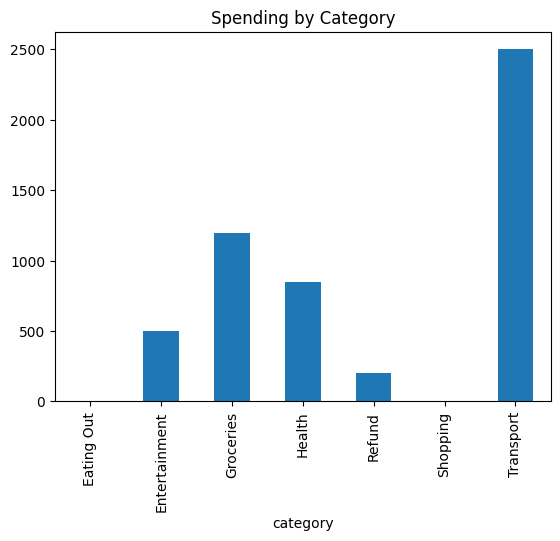

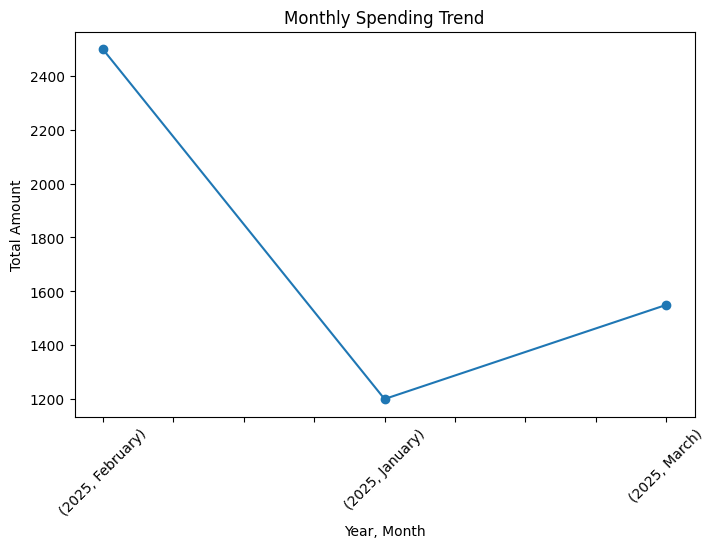

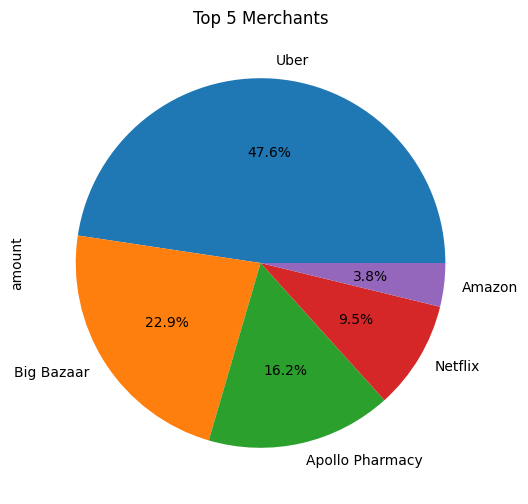

      type   amount
0  expense   200.00
1   income  5049.75


,date,amount,category,merchant,description,payment_method,account,city,tags,year,month,weekday,type,type_of_Total,category_sum,totaol_year_month
0,2025-01-01,1200.00,Groceries,Big Bazaar,Weekly groceries,Upi,Hdfc Debit,Bengaluru,home,2025,January,Wednesday,income,5049.75,1200.00,1200.00
1,2025-02-01,2500.00,Transport,Uber,Cab ride,Nan,Sbi Upi,Mumbai,commute,2025,February,Saturday,income,5049.75,2500.00,2500.00
3,2025-03-05,NaN,Eating Out,Zomato,Dinner,Card,Hdfc Credit,Bengaluru,weekend,2025,March,Wednesday,income,5049.75,0.00,1549.75
4,2025-03-05,499.00,Entertainment,Netflix,Subscription,Card,Hdfc Credit,Chennai,subscription,2025,March,Wednesday,income,5049.75,499.00,1549.75
5,2025-03-07,200.00,Refund,Amazon,Refund for returned item,Card,Hdfc Credit,Bengaluru,refund,2025,March,Friday,expense,200.00,200.00,1549.75
7,2025-03-15,NaN,Shopping,Flipkart,Clothes,Card,Icici Credit,Mumbai,shopping,2025,March,Saturday,income,5049.75,0.00,1549.75
8,2025-03-20,850.75,Health,Apollo Pharmacy,Medicines,Nan,Hdfc Debit,Delhi,health,2025,March,Thursday,income,5049.75,850.75,1549.75


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("messy_expenses.csv")
df['date'] = pd.to_datetime(df['date'] ,errors='coerce',dayfirst=True)
df.dropna( subset = ['date'] ,inplace =True)
df['amount'] = df['amount'].astype(str).str.replace(r"[^0-9.\-]", "" ,regex=True).replace({"": np.nan}).astype(float)
for c in ["category","merchant","payment_method","account","city"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()
for c in ["category","merchant","payment_method","account","city"]:
    if c in df.columns:
       df[c] = df[c].str.title()
df["category"] = df["category"].replace(["", "Nan", "None"], "Other")
df["merchant"] = df["merchant"].replace(["", "Nan", "None"], "Unknown")
#check duplicates
df.drop_duplicates(inplace = True)
#extract year from date
df['year'] = df['date'].dt.year
#extract month from date
df['month'] = df['date'].dt.month_name()
#extract weekday from date
df['weekday'] = df['date'].dt.day_name()
#to check income and expense
df['type'] = np.where(df['amount']<0 ,"expense","income")
df['amount'] = df['amount'].abs()
df['type_of_Total'] = df.groupby('type')['amount'].transform(sum)
df['category_sum'] = df.groupby("category")["amount"].transform(sum)
df['totaol_year_month'] = df.groupby(["year", "month"])["amount"].transform(sum)
df.groupby("category")["amount"].sum().plot(kind="bar")
plt.title("Spending by Category")
plt.show()
#monthly trend chart
df.groupby(['year',"month"])["amount"].sum().plot(kind="line", marker="o", figsize=(8,5), title="Monthly Spending Trend")
plt.xlabel("Year, Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


#which merchant takes more money
df.groupby("merchant")["amount"].sum().nlargest(5).plot(kind="pie" , autopct="%1.1f%%", figsize=(6,6), title="Top 5 Merchants")
plt.show()

summary = df.groupby("type")["amount"].sum().reset_index()
print(summary)

display(df)
